#RESNET#

Des réseaux neuronaux convolutionnels profonds ont obtenu le résultat de classification d’image au niveau humain. Les réseaux profonds extraient les caractéristiques et les classificateurs de bas, moyen et haut niveau d’une manière multicouche de bout en bout, et le nombre de couches empilées peut enrichir les « niveaux » de caractéristiques. La couche empilée est d’une importance cruciale, regardons le résultat ImageNet.

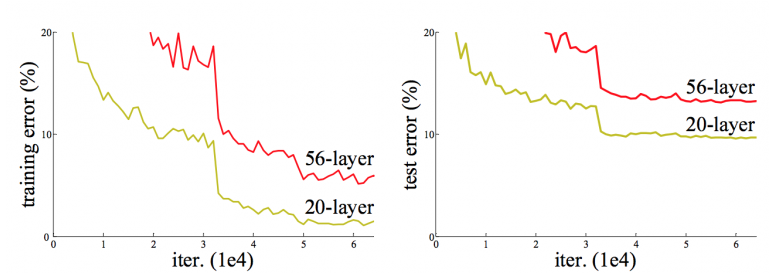

Lorsque le réseau plus profond commence à converger, un problème de dégradation a été exposé : avec la profondeur du réseau augmentant, la précision est saturée (ce qui pourrait ne pas être surprenant) puis se dégrade rapidement. Une telle dégradation n’est pas causée par le débordement ou par l’ajout de couches supplémentaires à un réseau profond, ce qui entraîne une erreur d’entraînement plus élevée. La détérioration de la précision de l’entraînement montre que tous les systèmes ne sont pas faciles à optimiser.

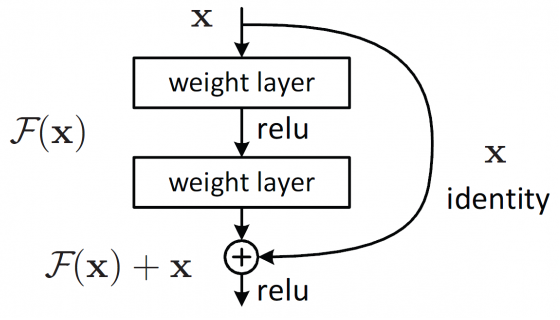

Pour surmonter ce problème, Microsoft a introduit un cadre d’apprentissage résiduel profond. Au lieu d’espérer que quelques couches empilées correspondent directement à une cartographie sous-jacente souhaitée, ils ont explicitement laissé ces couches s’adapter à une cartographie résiduelle. La formulation de F(x)+x peut être réalisée par des réseaux neuronaux feedforward avec des connexions raccourcies. Les connexions de raccourci sont celles sautant une ou plusieurs couches montrées dans la figure 1. Les connexions de raccourci effectuent le mappage d’identité, et leurs sorties sont ajoutées aux sorties des couches empilées. En utilisant le réseau résiduel, il existe de nombreux problèmes qui peuvent être résolus tels que:

Les ResNets sont faciles à optimiser, mais les réseaux « unis » (qui empilent simplement les couches) présentent une erreur d’entraînement plus élevée lorsque la profondeur augmente.

Les ResNets peut facilement gagner en précision à partir d’une profondeur considérablement accrue, produisant des résultats qui sont meilleurs que les réseaux précédents.

**Architecture**

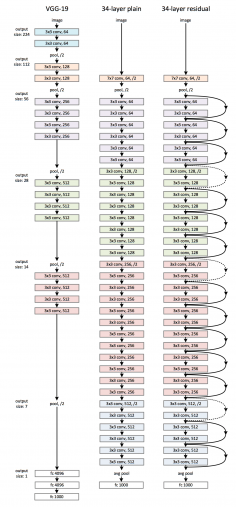

**Réseau de plaine** : Les lignes de base plaine (Fig. 2, milieu) sont principalement inspirés par la philosophie des filets VGG (Fig. 2, gauche). Les couches convolutionnelles ont pour la plupart 3 filtres et suivent deux règles simples :

Pour la même carte de caractéristiques de sortie, les couches ont le même nombre de filtres;
Si la taille de la carte des caractéristiques est réduite de moitié, le nombre de filtres est doublé pour préserver la complexité temporelle de chaque couche.

Il est intéressant de noter que le modèle ResNet a moins de filtres et de complexité que les réseaux VGG.

**Réseau résiduel** : Sur la base du réseau brut ci-dessus, une connexion raccourcie est insérée (Fig. 2, droite) qui transforme le réseau en sa version résiduelle correspondante. Les raccourcis d’identité F(x{W}+x) peuvent être utilisés directement lorsque l’entrée et la sortie ont les mêmes dimensions (raccourcis de ligne pleine dans la Fig. 2). Lorsque les dimensions augmentent (raccourcis en pointillés sur la Fig. 2), deux options sont envisagées :

Le raccourci effectue un mappage d’identité, avec des entrées de zéro supplémentaires rembourrées pour augmenter les dimensions. Cette option n’introduit aucun paramètre supplémentaire.
Le raccourci de projection dans F(x{W}+x) est utilisé pour faire correspondre les dimensions (fait par 1 1convolutions).

Pour l’une ou l’autre des options, si les raccourcis traversent des cartes de caractéristiques de deux tailles, il a effectué avec une foulée de 2.

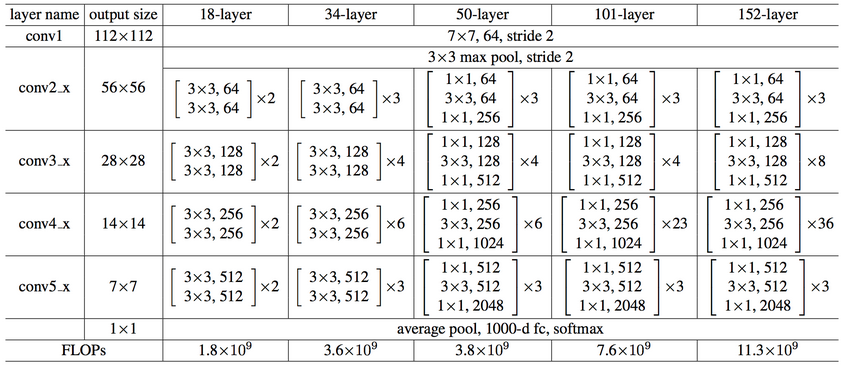

Chaque bloc ResNet a deux couches de profondeur (utilisées dans les petits réseaux comme ResNet 18, 34) ou trois couches de profondeur (ResNet 50, 101, 152).

ResNet à 50 couches : Chaque bloc à 2 couches est remplacé dans le filet à 34 couches par ce bloc goulot d’étranglement à 3 couches, ce qui donne un ResNet à 50 couches (voir le tableau ci-dessus). Ils utilisent l’option 2 pour augmenter les dimensions. Ce modèle a 3,8 milliards de FLOPs.

101-layer et 152-layer ResNets : ils construisent 101-layer et 152-layer ResNets en utilisant plus de blocs de 3-layer (au-dessus du tableau). Même après l’augmentation de la profondeur, le ResNet à 152 couches (11,3 milliards de FLOPs) présente une complexité inférieure aux réseaux VGG-16/19 (15,3/19,6 milliards de FLOPs)

**Mise en œuvre**

L’image est redimensionnée avec son côté plus court échantillonné aléatoirement dans [256,480] pour l’augmentation d’échelle. Une culture 224 224 est échantillonnée aléatoirement à partir d’une image ou de son basculement horizontal, avec la moyenne par pixel soustraite. Le taux d’apprentissage commence à 0,1 et est divisé par 10 lorsque l’erreur se stabilise et les modèles sont formés pour jusqu’à 60 10000 itérations. Ils utilisent une perte de poids de 0,0001 et une impulsion de 0,9.

**Résultat**

Le réseau à 18 couches n’est que le sous-espace du réseau à 34 couches, et il fonctionne toujours mieux. ResNet affiche un rendement supérieur avec une marge significative au cas où le réseau serait plus profond.

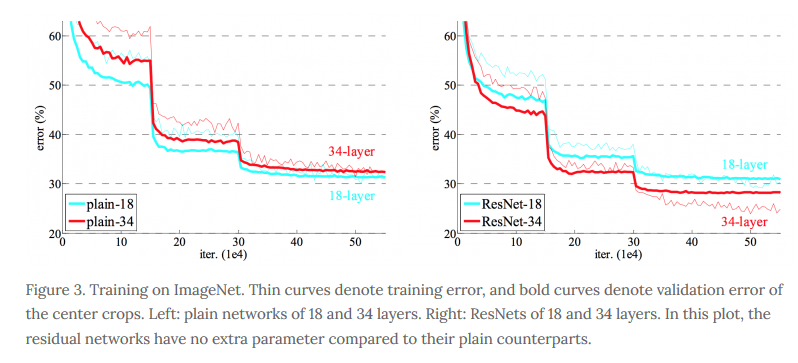

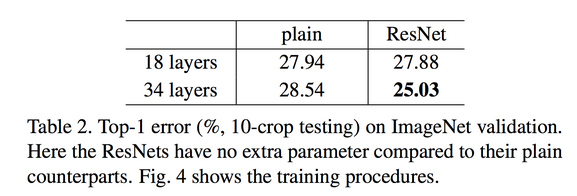

Le réseau ResNet converge plus rapidement que la simple contrepartie de celui-ci. La figure ci-dessous montre que le ResNet plus profond obtient de meilleurs résultats d’entraînement par rapport au réseau peu profond.

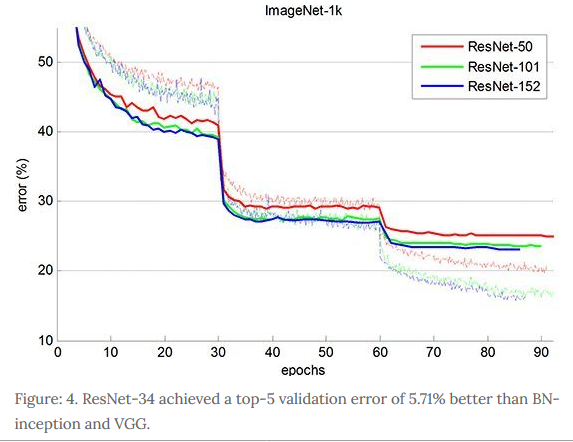

ResNet-152 obtient une erreur de validation des 5 premiers niveaux de 4,49 %. Une combinaison de 6 modèles avec des profondeurs différentes permet d’obtenir une erreur de validation des 5 premiers niveaux de 3,57 %. Gagner la 1ère place au ILSVRC-2015

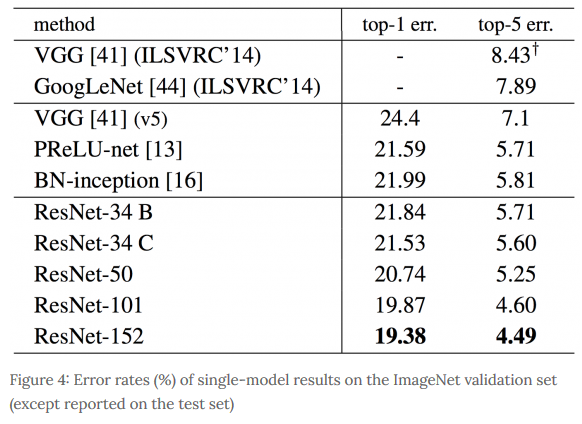